In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv("D:\\Entertainment\\Udmy\\Refactored_Py_DS_ML_Bootcamp-master\\15-Decision-Trees-and-Random-Forests\\loan_data.csv")

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.shape

(9578, 14)

In [6]:
loans.isnull().any().sum()

0

In [7]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

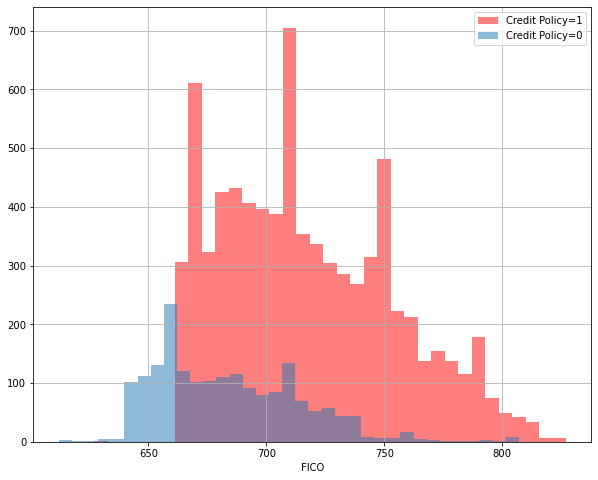

In [8]:
plt.figure(figsize=(10,8))
loans[loans["credit.policy"]==1]["fico"].hist(bins=35,alpha=0.5,label="Credit Policy=1",color="red")
loans[loans["credit.policy"]==0]["fico"].hist(bins=35,alpha=0.5,label="Credit Policy=0")
plt.xlabel("FICO")
plt.legend()

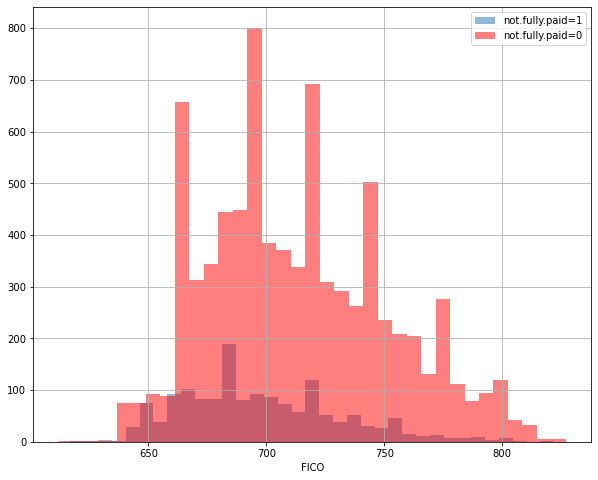

In [9]:
plt.figure(figsize=(10,8))
loans[loans["not.fully.paid"]==1]["fico"].hist(bins=35,alpha=0.5,label="not.fully.paid=1")
loans[loans["not.fully.paid"]==0]["fico"].hist(bins=35,alpha=0.5,label="not.fully.paid=0",color="red")
plt.xlabel("FICO")
plt.legend()

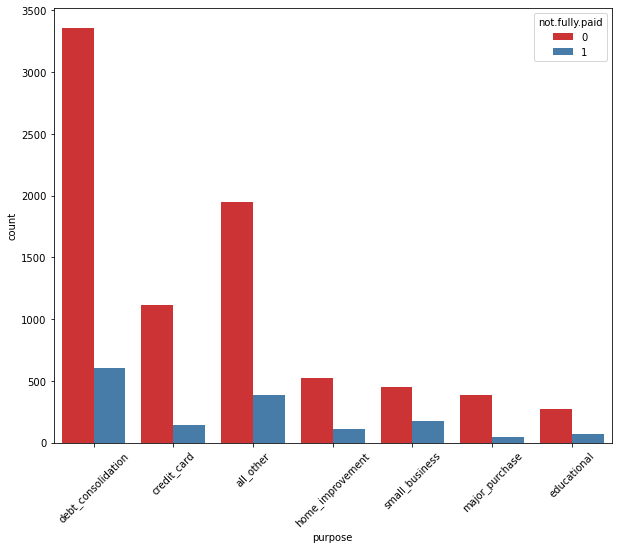

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x="purpose",hue="not.fully.paid",data=loans,palette="Set1")
plt.xticks(rotation=45)
plt.show()

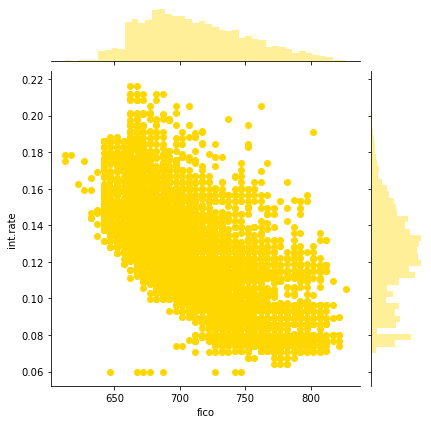

In [11]:
sns.jointplot(x="fico",y="int.rate",data=loans,color="gold")

<Figure size 576x576 with 0 Axes>

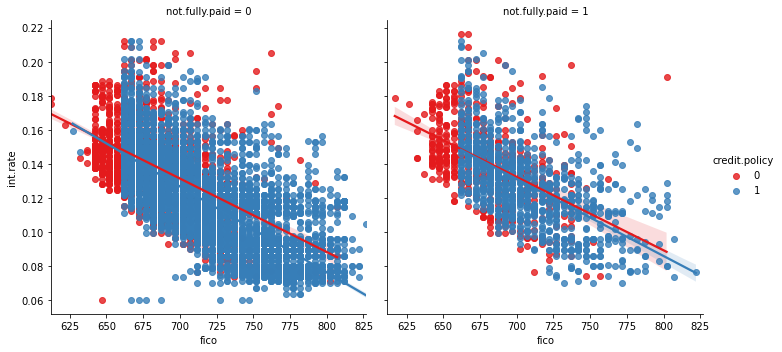

In [12]:
plt.figure(figsize=(8,8)) 
sns.lmplot(y="int.rate",x='fico',data=loans,hue='credit.policy',col="not.fully.paid",palette="Set1")


In [13]:
cat_feats=["purpose"]

In [14]:
final_data=pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [15]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=final_data.drop("not.fully.paid",axis=1)
y=final_data["not.fully.paid"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler=MinMaxScaler()

In [20]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree=DecisionTreeClassifier()

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
predictions=dtree.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      2666
           1       0.19      0.28      0.23       495

    accuracy                           0.70      3161
   macro avg       0.52      0.53      0.52      3161
weighted avg       0.75      0.70      0.72      3161



In [27]:
print(confusion_matrix(y_test,predictions))

[[2057  609]
 [ 355  140]]


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc=RandomForestClassifier(n_estimators=300)

In [30]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [31]:
predictions_rfc=rfc.predict(X_test)

In [32]:
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2666
           1       0.27      0.03      0.05       495

    accuracy                           0.84      3161
   macro avg       0.56      0.51      0.48      3161
weighted avg       0.76      0.84      0.78      3161



In [33]:
print(confusion_matrix(y_test,predictions_rfc))

[[2626   40]
 [ 480   15]]


# Thank You